In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\Ashish\Desktop\Analysis_project\cleaned_dataset_1.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')


  Lakes Lake_Group
0  Gull       Gull
1  Gull       Gull
2  Gull       Gull
3  Gull       Gull
4  Gull       Gull


C:\Users\Ashish\AppData\Local\Temp\ipykernel_2764\2082378880.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Lake_Group', y='Biotic_Index', palette='Set2')
C:\Users\Ashish\AppData\Local\Temp\ipykernel_2764\2082378880.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Lake_Group', y='Simpson_Diversity_Index', palette='Set3')


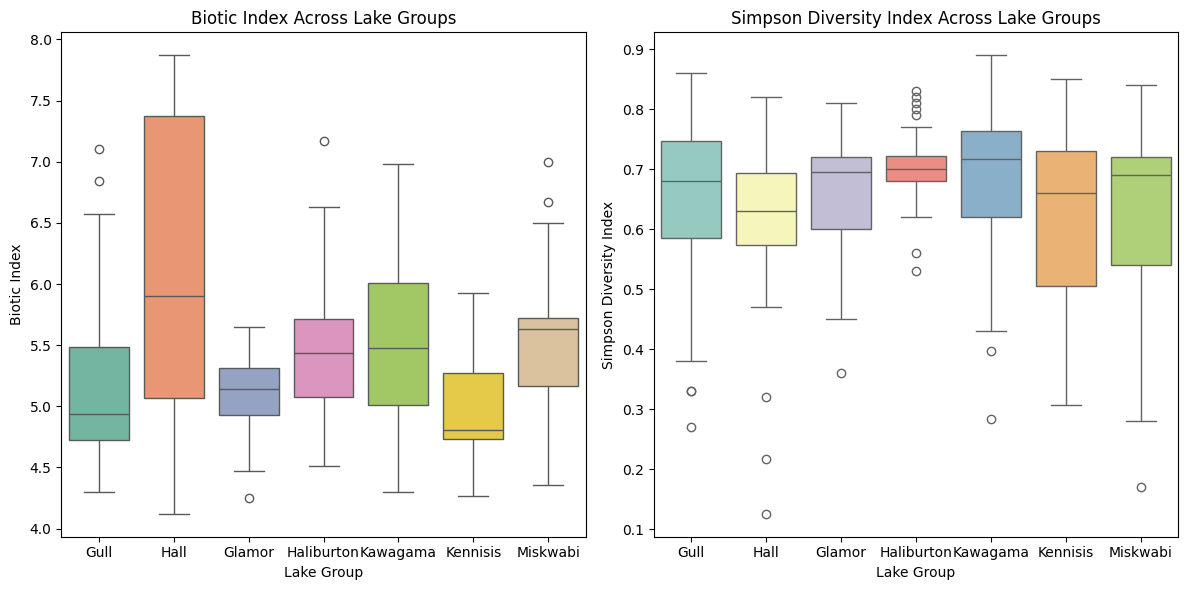

In [2]:
# Map lake names to their groups
lake_groups = {
    "Gull": "Gull",
    "Hall": "Hall",
    "Glamor": "Glamor",
    "Haliburton": "Haliburton",
    "Hawk": "Hawk",
    "Kawagama": "Kawagama",
    "Kennisis": "Kennisis",
    "Miskwabi": "Miskwabi"
}
data['Lake_Group'] = data['Lakes'].map(lake_groups)

# Check if the grouping worked
print(data[['Lakes', 'Lake_Group']].head())

# Set up the visualization
plt.figure(figsize=(12, 6))

# Boxplot for Biotic Index by Lake Group
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Lake_Group', y='Biotic_Index', palette='Set2')
plt.title('Biotic Index Across Lake Groups')
plt.xlabel('Lake Group')
plt.ylabel('Biotic Index')

# Boxplot for Simpson Diversity Index by Lake Group
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Lake_Group', y='Simpson_Diversity_Index', palette='Set3')
plt.title('Simpson Diversity Index Across Lake Groups')
plt.xlabel('Lake Group')
plt.ylabel('Simpson Diversity Index')

plt.tight_layout()
plt.show()


In [3]:
pip install folium geopandas


In [3]:
import geopandas as gpd
import folium
from shapely.geometry import Point
import pandas as pd

# Create a GeoDataFrame for the sites
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")  # Ensure the coordinate system is WGS84

# Define a fixed center point for the map (for example, the average of the dataset's latitudes and longitudes)
map_center = [45.1, -78.8]  # Use custom coordinates or calculate the mean of the dataset (example: [gdf['Latitude'].mean(), gdf['Longitude'].mean()])

# Create the map with a fixed center
lake_map = folium.Map(location=map_center, zoom_start=10, control_scale=True, tiles='cartodb positron')

# Define a color palette for each Lake Group (use distinct colors for visibility)
lake_group_colors = {
    "Gull": "blue",
    "Hall": "green",
    "Glamor": "red",
    "Haliburton": "purple",
    "L_Hawk": "orange",  # Separated Hawk into L_Hawk
    "B_Hawk": "brown",   # Separated Hawk into B_Hawk
    "Kawagama": "pink",
    "Kennisis": "lightgreen",  # Use hex color for yellow to avoid issues
    "Miskwabi": "darkblue"
}

# Handle missing Lake_Group values by assigning a default color (use a valid color like 'gray')
default_color = "gray"

# Add points to the map with color based on Lake Group and display necessary information
for _, row in gdf.iterrows():
    # Split Hawk Lake into L_Hawk and B_Hawk
    lake_group = row['Lake_Group']
    if lake_group == 'Hawk':
        lake_group = 'L_Hawk' if 'L' in row['Lakes'] else 'B_Hawk'
    
    color = lake_group_colors.get(lake_group, default_color)  # Use the default color if missing
    popup_text = f"Lake: {row['Lakes']}\nLake Group: {lake_group}\nBiotic Index: {row['Biotic_Index']}\nSimpson Diversity Index: {row['Simpson_Diversity_Index']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        tooltip=row['Lakes'],
        icon=folium.Icon(color=color)  # Color the marker based on the lake group
    ).add_to(lake_map)

# Add a color legend
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 160px; height: 280px; 
                background-color: white; border: 2px solid black; z-index: 9999; font-size: 12px;
                padding: 10px;">
        <b>Lake Groups</b><br>
        <i style="background: blue; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Gull<br>
        <i style="background: green; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Hall<br>
        <i style="background: red; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Glamor<br>
        <i style="background: purple; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Haliburton<br>
        <i style="background: orange; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> L_Hawk<br>
        <i style="background: brown; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> B_Hawk<br>
        <i style="background: pink; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Kawagama<br>
        <i style="background: lightgreen; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Kennisis<br>
        <i style="background: darkblue; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Miskwabi<br>
    </div>
'''
lake_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
lake_map


In [28]:
import geopandas as gpd
import folium
from shapely.geometry import Point
import pandas as pd

# Create a GeoDataFrame for the sites
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")  # Ensure the coordinate system is WGS84

# Define a fixed center point for the map (for example, the average of the dataset's latitudes and longitudes)
map_center = [44.5, -80.0]  # Use custom coordinates or calculate the mean of the dataset (example: [gdf['Latitude'].mean(), gdf['Longitude'].mean()])

# Create the map with a fixed center
lake_map = folium.Map(location=map_center, zoom_start=10, control_scale=True, tiles='cartodb positron')

# Define a color palette for each Lake Group
lake_group_colors = {
    "Gull": "blue",
    "Hall": "green",
    "Glamor": "red",
    "Haliburton": "purple",
    "L_Hawk": "orange",
    "B_Hawk": "brown",
    "Kawagama": "pink",
    "Kennisis": "lightgreen",  # Use hex color for yellow to avoid issues
    "Miskwabi": "darkblue"
}

# Handle missing Lake_Group values by assigning a default color (use a valid color like 'gray')
default_color = "gray"

# Group the data by Lake Group and calculate the average Biotic Index and Simpson Diversity Index
lake_group_avg = gdf.groupby('Lake_Group').agg({
    'Biotic_Index': 'mean',
    'Simpson_Diversity_Index': 'mean'
}).reset_index()

# Add points to the map with color based on Lake Group and display necessary information
for _, row in gdf.iterrows():
    # Split Hawk Lake into L_Hawk and B_Hawk
    lake_group = row['Lake_Group']
    if lake_group == 'Hawk':
        lake_group = 'L_Hawk' if 'L' in row['Lakes'] else 'B_Hawk'
    
    color = lake_group_colors.get(lake_group, default_color)  # Use the default color if missing
    popup_text = f"Lake: {row['Lakes']}\nLake Group: {lake_group}\nBiotic Index: {row['Biotic_Index']}\nSimpson Diversity Index: {row['Simpson_Diversity_Index']}"
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        tooltip=row['Lakes'],
        icon=folium.Icon(color=color)  # Color the marker based on the lake group
    ).add_to(lake_map)

# Add a border for a specific group, e.g., "Gull", with a label showing the average Biotic Index and Simpson Diversity Index
for _, group_row in lake_group_avg.iterrows():
    lake_group = group_row['Lake_Group']
    avg_biotic_index = group_row['Biotic_Index']
    avg_simpson_index = group_row['Simpson_Diversity_Index']
    
    # Define coordinates for the polygon (You can adjust this part to select the lakes in the group)
    group_lakes = gdf[gdf['Lake_Group'] == lake_group]
    coordinates = [(row['Latitude'], row['Longitude']) for _, row in group_lakes.iterrows()]
    
    if coordinates:
        # Create a polygon (or CircleMarker) around the group
        folium.Polygon(
            locations=coordinates,
            color='black',  # Border color
            weight=3,       # Border width
            fill=True,
            fill_color=lake_group_colors.get(lake_group, 'gray'),  # Fill color based on group
            fill_opacity=0.3,
            popup=f"Lake Group: {lake_group}\nAverage Biotic Index: {avg_biotic_index:.2f}\nAverage Simpson Diversity Index: {avg_simpson_index:.2f}"
        ).add_to(lake_map)

# Add a color legend (similar to the previous one)
legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 160px; height: 280px; 
                background-color: white; border: 2px solid black; z-index: 9999; font-size: 12px;
                padding: 10px;">
        <b>Lake Groups</b><br>
        <i style="background: blue; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Gull<br>
        <i style="background: green; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Hall<br>
        <i style="background: red; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Glamor<br>
        <i style="background: purple; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Haliburton<br>
        <i style="background: orange; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> L_Hawk<br>
        <i style="background: brown; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> B_Hawk<br>
        <i style="background: pink; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Kawagama<br>
        <i style="background: lightgreen; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Kennisis<br>
        <i style="background: darkblue; padding: 5px;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Miskwabi<br>
    </div>
'''
lake_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map
lake_map
